# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Из общей информации уже видно, что некоторые поля имеют невкрный тип данных.
Давайте сразу обозначим в каких полях мы поменяем тип данных в предобработке данных:
- last_price - int
- total_area - int
- floors_total - int
- kitchen_area - int
- balcony - int
- airports_nearest - int
- city_centers_nearest - int
- parks_around3000 - int
- parks_nearest	- int
- ponds_around3000 - int
- ponds_nearest -int
- days_exposition - int
- is_apartment - bool
- first_day_exposition - datetime

А название поля cityCenters_nearest имеет CamelCase. Исправим сразу это название в змеиный регистр.

In [2]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

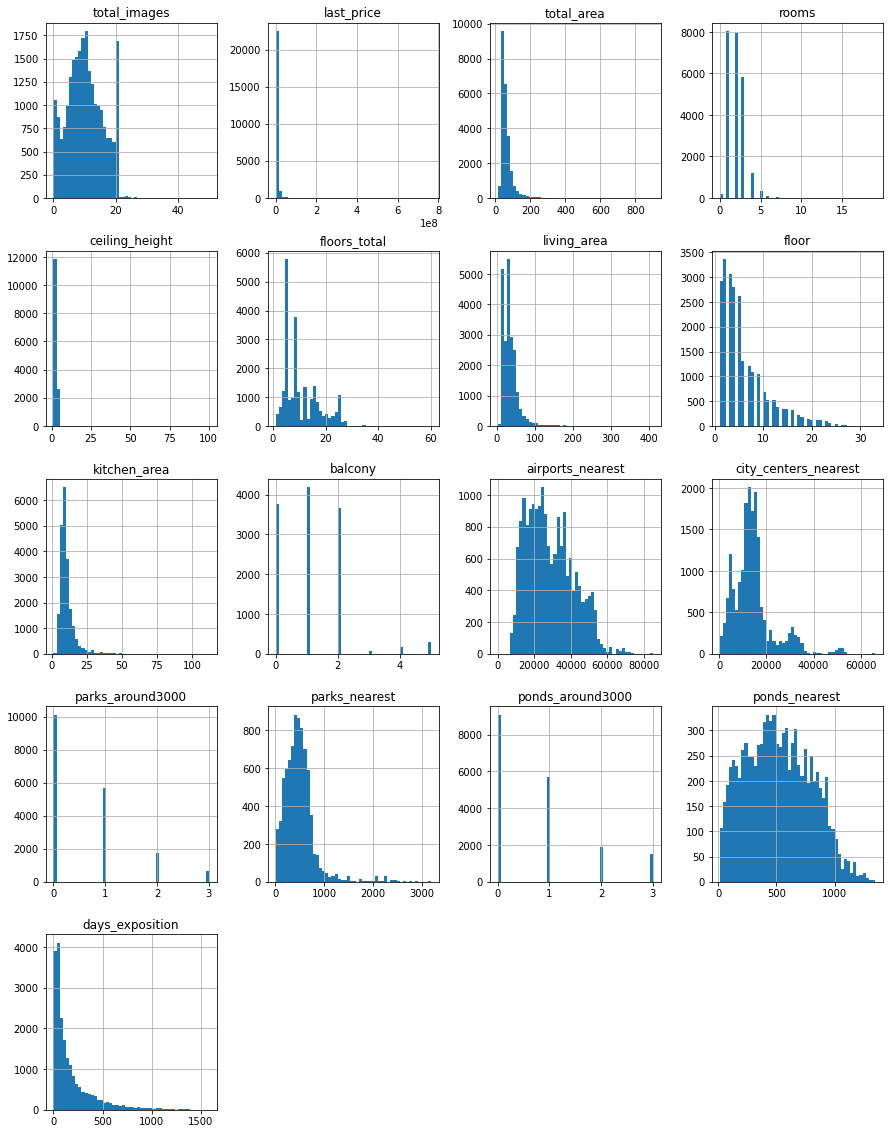

In [3]:
data.hist(figsize=(15, 20), bins=50);

Построены гистограммы по все числовым полям наших данных. Изучив гистограммы можно обнаружить аномалии. По полю ceiling_height - есть строки со значением 100, высота потолков не может быть 100м. Также есть гистограммы с сильным отклонением от среднего значения - это total_area, kitchen_area. Эти параметры необходимо проверить, что мы и сделаем далее в исследовательском анализе.

### Предобработка данных

Распишем ход выполнения работы по предобработке данных.
Основные этапы по предобработке данных:
- удаление дубликатов,
- обработка пропущенных значений (где это возможно),
- проверка и изменение типа данных,
- обработка выбросов.

#### Удаление дубликатов

Выясним сколько явных дубликатов у нас в данных

In [4]:
data.duplicated().sum()

0

Явные дубликаты отсутсвуют. В пртивном случае мы бы их удалили при помощи формулы `data.drop_duplicates(inplace=True)`

Пройдемся теперь по единственному текстовому полю и найдем неявные дубликаты.
Алгоритм действий такой:


In [5]:
# Пройдемся вручную и уберем в названии все кроме названия города
# Вначале выведем все уникальные названия, чтобы понять что нам убрать
data['locality_name'] = data['locality_name'].astype(str) #чтобы код работал и мы могли отсортировать вывод, заменим сразу тип данный на str
for name in sorted(data['locality_name'].unique()):
    print(name)

nan
Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
дере

In [6]:
# Убираем все кроме названия поселения и заодно меняем везде букву ё на е
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'поселок городского типа ', 'поселок станции ', 'посёлок при железнодорожной станции ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'городского типа ', 'городского типа имени ', 'при железнодорожной станции ', 'станции ', 'имени '], '', regex=True)
) 
for name in sorted(data['locality_name'].unique()):
    print(name)

nan
Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпоселок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичево
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Доли

#### Заполнение пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


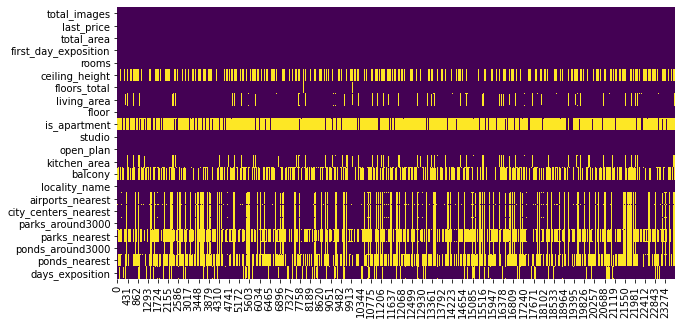

In [7]:
# Проверим данные на пропуски
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(data.isnull().sum())

# Визуализируем пропущенные значения в каждом поле
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull().transpose(), cbar=False, cmap='viridis')
plt.show()

На сонове полученных данных опишим как мы будем заполнять пропуски по всем полям, где это нужно сделать:
- ceiling_height(высота потолков) - заполним медианным значением, т.к. высота потолков не сильно отличается в в большинстве квартир
- floors_total(этажей в доме) - сгруппируем по населенному пункту и найдем медианное значение для каждого населенного пункта
- living_area(жилая площадь в квадратных метрах) - т.к. пропусков очень много, то мы нем ожеи просто так их оставить или поставить 0, т.к. это отразится на показателяи по этому полю. Попробуем использовать линейную регрессию от общей площади и количества комнат.
- is_apartment(апартаменты) - здесь скорее всего если жилье не аппартаменты, то создатель объявления просто не ставил отметку. Заполним все пропуски значением False.
- kitchen_area(площадь кухни в квадратных метрах) - точно также как и с жилой площадью попробуем применить линейную регрессию от общей площади.
- balcony(число балконов) скорее всего пропуски это отсутствие балкона. Заполним пропуски значением 0.
- airports_nearest(расстояние до ближайшего аэропорта в метрах) - сгруппируем значение по населенному пункту и заполним медианным значением
- city_centers_nearest(расстояние до центра города в метрах) - сгруппируем значение по населенному пункту и заполним медианным значением
- parks_around3000(число парков в радиусе 3 км) - сгруппируем значение по населенному пункту и заполним медианным значением
- parks_nearest(расстояние до ближайшего парка в метрах) - очень большое количество пропусков, если мы заполним их медианным или средним значением, то у нас образуется большой перекос в сторону этих значений. Поэтому мы не будем заменять пропуски, а оставим их как есть и исследуем только имеющиеся значения
- ponds_around3000(число водоёмов в радиусе 3 км) - сгруппируем значение по населенному пункту и заполним медианным значением
- ponds_nearest(расстояние до ближайшего водоёма в метрах) - очень большое количество пропусков, если мы заполним их медианным или средним значением, то у нас образуется большой перекос в сторону этих значений. Поэтому мы не будем заменять пропуски, а оставим их как есть
- days_exposition(сколько дней было размещено объявление (от публикации до снятия)) - скорее всего объявление еще не снято, поэтому заполним пропуски значением 0.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64


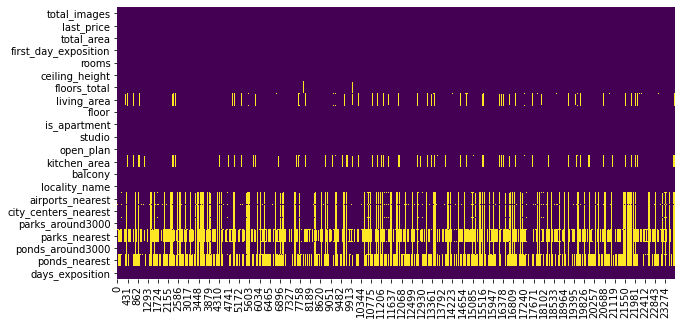

In [8]:
# Заполнение пропусков для 'ceiling_height'
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Заполнение пропусков для 'balcony'
data['balcony'].fillna(0, inplace=True)

# Заполнение пропусков для 'is_apartment'
data['is_apartment'].fillna(False, inplace=True)

# Заполнение пропусков для 'days_exposition'
data['days_exposition'].fillna(0, inplace=True)

print(data.isnull().sum())

# Визуализируем пропущенные значения в каждом поле
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull().transpose(), cbar=False, cmap='viridis')
plt.show()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64


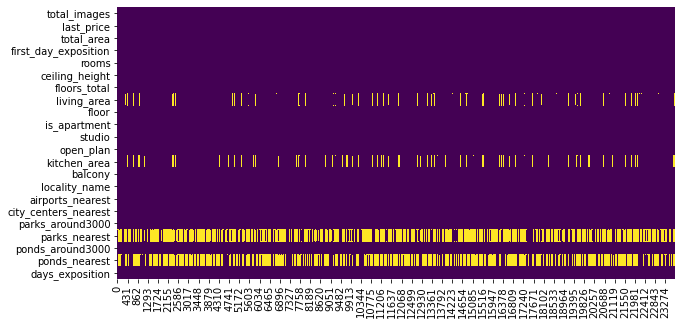

In [9]:
# Заполнение NaN в пустых группах значением 0
for column in ['airports_nearest', 'city_centers_nearest', 
               'parks_around3000', 'ponds_around3000']:
    data[column] = data.groupby('locality_name')[column].transform(lambda x: x.fillna(0) if len(x.dropna()) == 0 else x)

# Заполнение пропусков с проверкой на пустые группы
for column in ['airports_nearest', 'city_centers_nearest', 
               'parks_around3000', 'ponds_around3000']:
    data[column] = data.groupby('locality_name')[column].transform(lambda x: x.fillna(x.median()) if len(x.dropna()) > 0 else x)
    
# Заполнение пропусков для 'floors_total'
data['floors_total'] = data.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.median()))

print(data.isnull().sum())

# Визуализируем пропущенные значения в каждом поле
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull().transpose(), cbar=False, cmap='viridis')
plt.show()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64


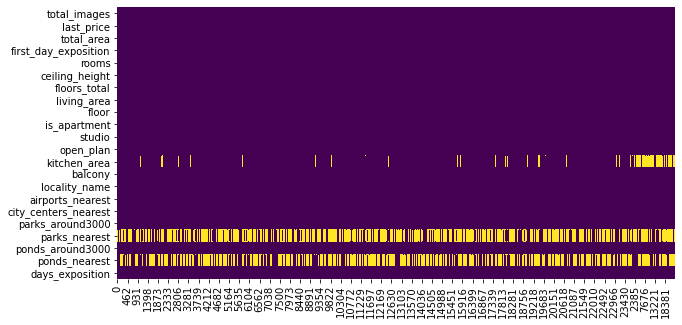

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Разделение данных
data_train = data[data['living_area'].notna()]
data_test = data[data['living_area'].isna()].copy()  # Создание копии

# Обучение модели
model = LinearRegression()
model.fit(data_train[['total_area', 'rooms']], data_train['living_area'])

# Предсказание пропущенных значений
predicted_living_area = model.predict(data_test[['total_area', 'rooms']])

# Заполнение пропусков
data_test.loc[:, 'living_area'] = predicted_living_area 

# Объединение данных
data = pd.concat([data_train, data_test])

# Проверка на NaN
print(data.isnull().sum())

# Визуализируем пропущенные значения в каждом поле
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull().transpose(), cbar=False, cmap='viridis')
plt.show()

data.info()



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64


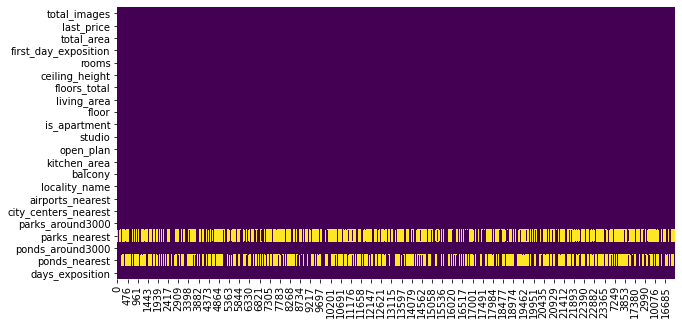

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Линейная регрессия для 'kitchen_area'
data_train = data[data['kitchen_area'].notna()]
data_test = data[data['kitchen_area'].isna()].copy()  # Создание копии

# Обучение модели
model = LinearRegression()
model.fit(data_train[['total_area']], data_train['kitchen_area'])

# Предсказание пропущенных значений
predicted_kitchen_area = model.predict(data_test[['total_area']])

# Заполнение пропусков
data_test.loc[:, 'kitchen_area'] = predicted_kitchen_area  # Используем .loc[]

# Объединение данных
data = pd.concat([data_train, data_test])

# Проверка на NaN
print(data.isnull().sum())

# Визуализируем пропущенные значения в каждом поле
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull().transpose(), cbar=False, cmap='viridis')
plt.show()

data.info()

In [12]:
# Взглянем еа поля после линейной регресии. Вроде пропуски заполнились корректно.
# Единственное - это минимальные значения, которые скорее всего некорректны, но это мы посмотрим уже в исследовательском анализе. 
print(data['living_area'].describe())
print(data['kitchen_area'].describe())

count    23699.000000
mean        34.566862
std         22.283072
min          2.000000
25%         18.700000
50%         30.000000
75%         42.334677
max        409.700000
Name: living_area, dtype: float64
count    23699.000000
mean        10.528608
std          5.764502
min          1.300000
25%          7.135110
50%          9.100000
75%         11.930354
max        112.000000
Name: kitchen_area, dtype: float64


#### Изменение типа данных

In [13]:
# Изменим тип данных так, как мы указали в пункте 1 нашего исследования.
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int64         
 13  balcony         

Причины пропусков и дубликатов в данных скорее всего из-за:
Человеческий фактор: Ошибки ввода данных, не желание отвечать на определенные вопросы.
Технические проблемы: Возможны сбои с оборудованием или программным обеспечением для сбора данных. Отсутствующие данные могут быть удалены в процессе обработки или очистки данных.
Методологические: нет общих требовнаний для названия населенных пунктов, типов данных при введении информации.

### Добавьте в таблицу новые столбцы

In [14]:
# 1. Цена одного квадратного метра
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2)

# 2. День недели публикации объявления
data['weekday_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

# 3. Месяц публикации объявления
data['month_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.month

# 4. Год публикации объявления
data['year_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.year

# 5. Тип этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# 6. Расстояние до центра города в километрах
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

# Вывод обновленного DataFrame
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,83750.00,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
5,10,2890000,30,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55,96333.33,0,9,2018,другой,0.0


### Исследовательский анализ данных

Изучаем перечисленные параметры объектов и строим отдельные гистограммы для каждого из этих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

#### Высота потолков
Давайте рассмотрим параметр на выбросы, устраним их если они присуисивуют и найдем закономерности

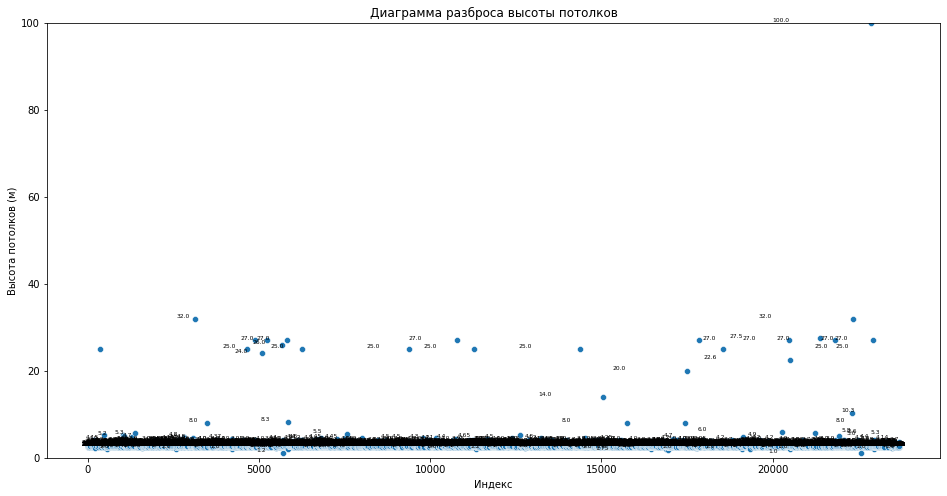

In [15]:
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
plt.figure(figsize=(16, 8))
sns.scatterplot(x=data.index, y=data['ceiling_height'])
plt.title('Диаграмма разброса высоты потолков')
plt.xlabel('Индекс')
plt.ylabel('Высота потолков (м)')
for i, val in enumerate(data['ceiling_height']):
    plt.text(i, val, str(val), fontsize=6, ha='center', va='bottom') 
plt.ylim(0, 100)
plt.show()

In [16]:
# По диаграмме выше видны аномалии. Давайте посмотрим все уникальные значения и количесво объявлений по каждому уникальному значению
unique_heights = data['ceiling_height'].unique()
counts = {}
for height in unique_heights:
    count = data['ceiling_height'][data['ceiling_height'] == height].count()
    counts[height] = count

sorted_counts = sorted(counts.items(), key=lambda item: item[0])

for height, count in sorted_counts:
    print(f'Высота потолков {height}: {count} объявлений')

Высота потолков 1.0: 1 объявлений
Высота потолков 1.2: 1 объявлений
Высота потолков 1.75: 1 объявлений
Высота потолков 2.0: 11 объявлений
Высота потолков 2.2: 1 объявлений
Высота потолков 2.25: 1 объявлений
Высота потолков 2.3: 4 объявлений
Высота потолков 2.34: 1 объявлений
Высота потолков 2.4: 23 объявлений
Высота потолков 2.45: 15 объявлений
Высота потолков 2.46: 2 объявлений
Высота потолков 2.47: 3 объявлений
Высота потолков 2.48: 8 объявлений
Высота потолков 2.49: 1 объявлений
Высота потолков 2.5: 3515 объявлений
Высота потолков 2.51: 34 объявлений
Высота потолков 2.52: 79 объявлений
Высота потолков 2.53: 67 объявлений
Высота потолков 2.54: 83 объявлений
Высота потолков 2.55: 980 объявлений
Высота потолков 2.56: 139 объявлений
Высота потолков 2.57: 103 объявлений
Высота потолков 2.58: 63 объявлений
Высота потолков 2.59: 14 объявлений
Высота потолков 2.6: 1646 объявлений
Высота потолков 2.61: 5 объявлений
Высота потолков 2.62: 14 объявлений
Высота потолков 2.63: 13 объявлений
Высот

Примем что минимальная высота потолков - 1.75, максимальная - 14. Значения которые меньше этих парметров умножим на 10, которые больше - разделим на 10.

In [17]:
def normal_height(height):
    if height < 1.75:
        return round(height * 10, 2)
    elif height > 14:
        return round(height / 10, 2)
    else:
        return height

data['ceiling_height'] = data['ceiling_height'].apply(normal_height)
# Подсчет количества объявлений для каждой высоты потолков
unique_heights = data['ceiling_height'].unique()
counts = {}
for height in unique_heights:
    count = data['ceiling_height'][data['ceiling_height'] == height].count()
    counts[height] = count

# Сортировка по высоте потолков
sorted_counts = sorted(counts.items(), key=lambda item: item[0])

# Вывод результата
for height, count in sorted_counts:
    print(f'Высота потолков {height:.2f}: {count} объявлений') 

Высота потолков 1.75: 1 объявлений
Высота потолков 2.00: 12 объявлений
Высота потолков 2.20: 1 объявлений
Высота потолков 2.25: 1 объявлений
Высота потолков 2.26: 1 объявлений
Высота потолков 2.30: 4 объявлений
Высота потолков 2.34: 1 объявлений
Высота потолков 2.40: 24 объявлений
Высота потолков 2.45: 15 объявлений
Высота потолков 2.46: 2 объявлений
Высота потолков 2.47: 3 объявлений
Высота потолков 2.48: 8 объявлений
Высота потолков 2.49: 1 объявлений
Высота потолков 2.50: 3522 объявлений
Высота потолков 2.51: 34 объявлений
Высота потолков 2.52: 79 объявлений
Высота потолков 2.53: 67 объявлений
Высота потолков 2.54: 83 объявлений
Высота потолков 2.55: 980 объявлений
Высота потолков 2.56: 139 объявлений
Высота потолков 2.57: 103 объявлений
Высота потолков 2.58: 63 объявлений
Высота потолков 2.59: 14 объявлений
Высота потолков 2.60: 1647 объявлений
Высота потолков 2.61: 5 объявлений
Высота потолков 2.62: 14 объявлений
Высота потолков 2.63: 13 объявлений
Высота потолков 2.64: 81 объявле

In [18]:
# Отсортируем по количесву объявлений
# Сортировка по кол-ву объвлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for height, count in sorted_counts:
    print(f'Высота потолков {height:.2f}: {count} объявлений') 

Высота потолков 2.65: 9871 объявлений
Высота потолков 2.50: 3522 объявлений
Высота потолков 2.60: 1647 объявлений
Высота потолков 2.70: 1582 объявлений
Высота потолков 3.00: 1112 объявлений
Высота потолков 2.80: 993 объявлений
Высота потолков 2.55: 980 объявлений
Высота потолков 2.75: 911 объявлений
Высота потолков 3.20: 279 объявлений
Высота потолков 3.10: 203 объявлений
Высота потолков 2.90: 164 объявлений
Высота потолков 3.30: 141 объявлений
Высота потолков 2.56: 139 объявлений
Высота потолков 3.50: 130 объявлений
Высота потолков 2.57: 103 объявлений
Высота потолков 2.85: 101 объявлений
Высота потолков 3.40: 92 объявлений
Высота потолков 2.54: 83 объявлений
Высота потолков 2.64: 81 объявлений
Высота потолков 2.52: 79 объявлений
Высота потолков 2.53: 67 объявлений
Высота потолков 2.58: 63 объявлений
Высота потолков 2.77: 61 объявлений
Высота потолков 2.76: 60 объявлений
Высота потолков 3.15: 57 объявлений
Высота потолков 2.78: 51 объявлений
Высота потолков 2.95: 47 объявлений
Высота 

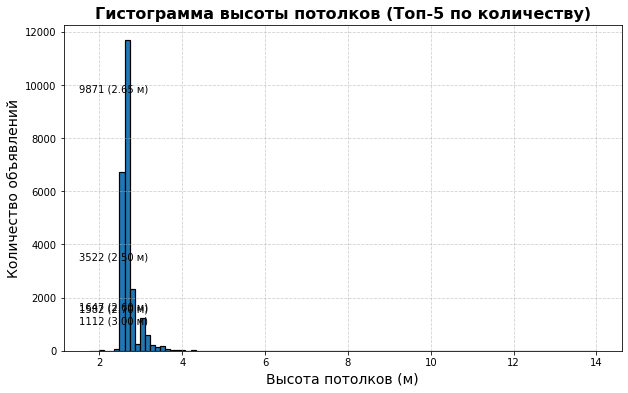

Процентное соотношение первых пяти значений высоты потолков:
2.65 м: 41.65%
2.50 м: 14.86%
2.60 м: 6.95%
2.70 м: 6.68%
3.00 м: 4.69%


In [19]:
data['ceiling_height'] = data['ceiling_height'].apply(normal_height)

# Подсчет количества объявлений для каждой высоты потолков
unique_heights = data['ceiling_height'].unique()
counts = {}
for height in unique_heights:
    count = data['ceiling_height'][data['ceiling_height'] == height].count()
    counts[height] = count

# Сортировка по количеству объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Извлечение первых пяти значений по количеству объявлений
top_5_heights = [height for height, count in sorted_counts[:5]]
top_5_counts = [count for height, count in sorted_counts[:5]]

# Создание DataFrame для гистограммы
height_counts = data['ceiling_height'].value_counts().to_frame(name='count').sort_index()

# Получение максимального значения количества объявлений
max_count = height_counts['count'].max()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(data['ceiling_height'], bins=100, edgecolor='black', linewidth=1.2)  # Закрываем скобку
#plt.bar(height_counts.index, height_counts['count'].clip(upper=max_count)) 
plt.xlabel('Высота потолков (м)', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.title('Гистограмма высоты потолков (Топ-5 по количеству)', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение топ-5 значений по оси Y с соответствием по оси X
for i, count in enumerate(top_5_counts):
    # Вычисляем позицию по оси Y для текста
    y_pos = count + 0.5  # Добавляем немного отступа от вершины столбца
    # Добавляем текст с значением по оси Y и соответствием по оси X
    plt.text(1.5, y_pos, f'{count} ({top_5_heights[i]:.2f} м)', ha='left', va='center')

plt.show()

# Вычисление процентного соотношения первых пяти значений
total_count = len(data['ceiling_height'])  # Общее количество объявлений
percentages = [count / total_count * 100 for count in top_5_counts]

# Вывод процентных соотношений

print("Процентное соотношение первых пяти значений высоты потолков:")
for i, height in enumerate(top_5_heights):
    print(f"{height:.2f} м: {percentages[i]:.2f}%")

Вывод:

Больше всего квартир в объявлениях имеют высоту 2,65м

#### Общая площадь;

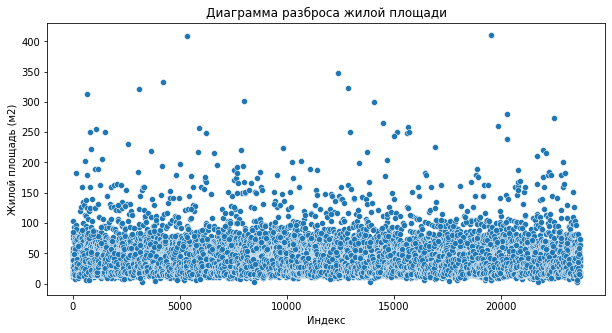

In [20]:
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['living_area'])
plt.title('Диаграмма разброса жилой площади')
plt.xlabel('Индекс')
plt.ylabel('Жилой площадь (м2)')
plt.show()

Каких то аномалий не обнаружено.
Построим гистограмму

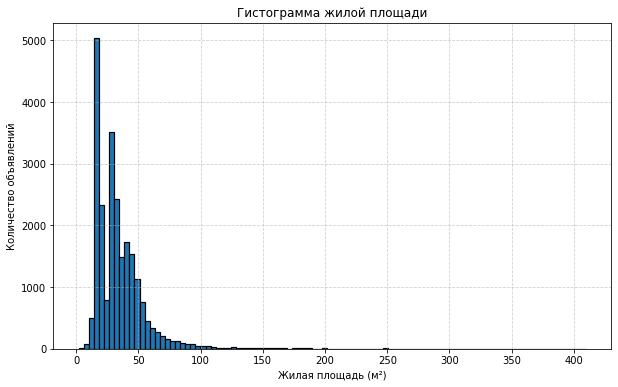

In [21]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data['living_area'].hist(bins=100, edgecolor='black', linewidth=1.2)
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма жилой площади')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [22]:
# Подсчет количества объявлений для каждой жилой площади
unique_areas = data['living_area'].unique()
counts = {}
for area in unique_areas:
    count = data['living_area'][data['living_area'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for area, count in sorted_counts:
    print(f'Жилая площадь {area:.2f}: {count} объявлений')

Жилая площадь 18.00: 882 объявлений
Жилая площадь 17.00: 675 объявлений
Жилая площадь 30.00: 598 объявлений
Жилая площадь 16.00: 486 объявлений
Жилая площадь 20.00: 481 объявлений
Жилая площадь 28.00: 423 объявлений
Жилая площадь 31.00: 381 объявлений
Жилая площадь 19.00: 329 объявлений
Жилая площадь 32.00: 320 объявлений
Жилая площадь 29.00: 319 объявлений
Жилая площадь 15.00: 313 объявлений
Жилая площадь 27.00: 311 объявлений
Жилая площадь 43.00: 231 объявлений
Жилая площадь 40.00: 225 объявлений
Жилая площадь 42.00: 217 объявлений
Жилая площадь 33.00: 214 объявлений
Жилая площадь 35.00: 194 объявлений
Жилая площадь 34.00: 188 объявлений
Жилая площадь 39.00: 187 объявлений
Жилая площадь 36.00: 170 объявлений
Жилая площадь 17.50: 170 объявлений
Жилая площадь 44.00: 169 объявлений
Жилая площадь 38.00: 159 объявлений
Жилая площадь 45.00: 148 объявлений
Жилая площадь 37.00: 140 объявлений
Жилая площадь 21.00: 137 объявлений
Жилая площадь 47.00: 137 объявлений
Жилая площадь 48.00: 133 объ

In [23]:
# Подсчет количества объявлений для каждой жилой площади
unique_areas = data['living_area'].unique()
counts = {}
for area in unique_areas:
    count = data['living_area'][data['living_area'] == area].count()
    counts[area] = count

# Сортировка по жилой площади
sorted_counts = sorted(counts.items(), key=lambda item: item[0])

# Вывод результата
for area, count in sorted_counts:
    print(f'Жилая площадь {area:.2f}: {count} объявлений')

Жилая площадь 2.00: 2 объявлений
Жилая площадь 3.00: 2 объявлений
Жилая площадь 3.39: 1 объявлений
Жилая площадь 4.47: 1 объявлений
Жилая площадь 5.00: 1 объявлений
Жилая площадь 5.40: 1 объявлений
Жилая площадь 5.64: 1 объявлений
Жилая площадь 6.00: 1 объявлений
Жилая площадь 6.10: 2 объявлений
Жилая площадь 6.28: 1 объявлений
Жилая площадь 6.50: 1 объявлений
Жилая площадь 6.55: 1 объявлений
Жилая площадь 6.59: 1 объявлений
Жилая площадь 6.74: 2 объявлений
Жилая площадь 6.83: 1 объявлений
Жилая площадь 7.00: 1 объявлений
Жилая площадь 7.13: 1 объявлений
Жилая площадь 7.65: 2 объявлений
Жилая площадь 8.00: 2 объявлений
Жилая площадь 8.30: 1 объявлений
Жилая площадь 8.40: 1 объявлений
Жилая площадь 8.48: 1 объявлений
Жилая площадь 8.50: 1 объявлений
Жилая площадь 8.64: 1 объявлений
Жилая площадь 8.80: 2 объявлений
Жилая площадь 8.90: 1 объявлений
Жилая площадь 9.00: 1 объявлений
Жилая площадь 9.00: 9 объявлений
Жилая площадь 9.10: 1 объявлений
Жилая площадь 9.22: 1 объявлений
Жилая площ

In [24]:
# Группировка значений living_area с шагом 10
max_area = int(data['living_area'].max())  # Преобразуем в целое число
grouped_areas = pd.cut(data['living_area'], bins=range(0, max_area + 10, 10), include_lowest=True, right=False)

# Подсчет количества значений в каждой группе
area_counts = grouped_areas.value_counts().sort_index()

# Вывод результата
print("Группировка жилой площади с шагом 10:")
print(area_counts)

Группировка жилой площади с шагом 10:
[0, 10)         49
[10, 20)      6693
[20, 30)      4606
[30, 40)      5313
[40, 50)      3674
[50, 60)      1493
[60, 70)       692
[70, 80)       380
[80, 90)       242
[90, 100)      155
[100, 110)      99
[110, 120)      57
[120, 130)      46
[130, 140)      30
[140, 150)      32
[150, 160)      27
[160, 170)      29
[170, 180)      13
[180, 190)      18
[190, 200)       8
[200, 210)       6
[210, 220)       6
[220, 230)       5
[230, 240)       2
[240, 250)       3
[250, 260)       8
[260, 270)       2
[270, 280)       2
[280, 290)       0
[290, 300)       0
[300, 310)       2
[310, 320)       1
[320, 330)       2
[330, 340)       1
[340, 350)       1
[350, 360)       0
[360, 370)       0
[370, 380)       0
[380, 390)       0
[390, 400)       0
[400, 410)       2
Name: living_area, dtype: int64


Вывод:
Большевсего объявлений с жилой площадью от 15 до 40 м2. Можно предположить, что это свартиры студии, одно- и двух- комнатные квартиры.

#### Количество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


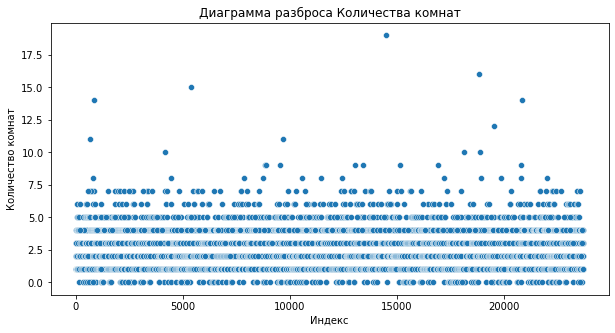

In [25]:
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
print(data['rooms'].describe())

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['rooms'])
plt.title('Диаграмма разброса Количества комнат')
plt.xlabel('Индекс')
plt.ylabel('Количество комнат')
plt.show()

Аномалий не выявлено.

In [26]:
# Подсчет количества объявлений по кол-ву комнат
unique_areas = data['rooms'].unique()
counts = {}
for area in unique_areas:
    count = data['rooms'][data['rooms'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for area, count in sorted_counts:
    print(f'Количество комнат {area:.2f}: {count} объявлений')

Количество комнат 1.00: 8047 объявлений
Количество комнат 2.00: 7940 объявлений
Количество комнат 3.00: 5814 объявлений
Количество комнат 4.00: 1180 объявлений
Количество комнат 5.00: 326 объявлений
Количество комнат 0.00: 197 объявлений
Количество комнат 6.00: 105 объявлений
Количество комнат 7.00: 59 объявлений
Количество комнат 8.00: 12 объявлений
Количество комнат 9.00: 8 объявлений
Количество комнат 10.00: 3 объявлений
Количество комнат 11.00: 2 объявлений
Количество комнат 14.00: 2 объявлений
Количество комнат 15.00: 1 объявлений
Количество комнат 19.00: 1 объявлений
Количество комнат 16.00: 1 объявлений
Количество комнат 12.00: 1 объявлений


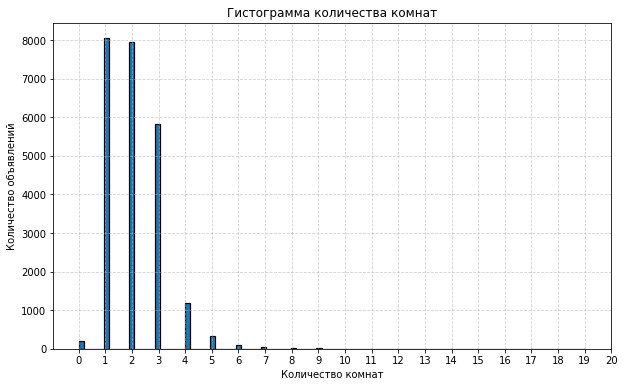

In [27]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data['rooms'].hist(bins=100, edgecolor='black', linewidth=1.2)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма количества комнат')
plt.grid(True, linestyle='--', alpha=0.6)

# Установка меток оси X с шагом 1
plt.xticks(range(int(data['rooms'].min()), int(data['rooms'].max()) + 2, 1))

plt.show()

In [28]:
# Подсчет количества объявлений с однокомнатными и двухкомнатными квартирами
one_room_count = data['rooms'][data['rooms'] == 1].count()
two_room_count = data['rooms'][data['rooms'] == 2].count()
three_room_count = data['rooms'][data['rooms'] == 3].count()
# Общее количество объявлений
total_count = len(data)

# Вычисление процентов
one_room_percent = (one_room_count / total_count) * 100
two_room_percent = (two_room_count / total_count) * 100
three_room_percent = (three_room_count / total_count) * 100
# Вывод результата
print(f"Процент объявлений с однокомнатными квартирами: {one_room_percent:.2f}%")
print(f"Процент объявлений с двухкомнатными квартирами: {two_room_percent:.2f}%")
print(f"Процент объявлений с трехкомнатными квартирами: {three_room_percent:.2f}%")

Процент объявлений с однокомнатными квартирами: 33.96%
Процент объявлений с двухкомнатными квартирами: 33.50%
Процент объявлений с трехкомнатными квартирами: 24.53%


Вывод:
Основная масса объявлений с однокомнатынми и двухкомнатными квартирами.

#### Общая площадь

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


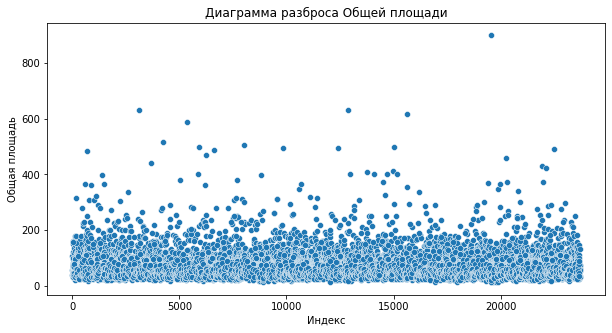

In [29]:
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
print(data['total_area'].describe())

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['total_area'])
plt.title('Диаграмма разброса Общей площади')
plt.xlabel('Индекс')
plt.ylabel('Общая площадь')
plt.show()

Аномалий не выявлено

In [30]:
# Подсчет количества объявлений по общей площади
unique_areas = data['total_area'].unique()
counts = {}
for area in unique_areas:
    count = data['total_area'][data['total_area'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for area, count in sorted_counts:
    print(f'Общая площадь {area:.2f}: {count} объявлений')

Общая площадь 45.00: 763 объявлений
Общая площадь 44.00: 697 объявлений
Общая площадь 42.00: 657 объявлений
Общая площадь 31.00: 645 объявлений
Общая площадь 35.00: 569 объявлений
Общая площадь 43.00: 561 объявлений
Общая площадь 36.00: 557 объявлений
Общая площадь 40.00: 549 объявлений
Общая площадь 32.00: 544 объявлений
Общая площадь 60.00: 534 объявлений
Общая площадь 46.00: 514 объявлений
Общая площадь 38.00: 508 объявлений
Общая площадь 41.00: 493 объявлений
Общая площадь 50.00: 485 объявлений
Общая площадь 33.00: 483 объявлений
Общая площадь 34.00: 449 объявлений
Общая площадь 30.00: 446 объявлений
Общая площадь 55.00: 431 объявлений
Общая площадь 57.00: 427 объявлений
Общая площадь 54.00: 426 объявлений
Общая площадь 37.00: 425 объявлений
Общая площадь 58.00: 417 объявлений
Общая площадь 39.00: 408 объявлений
Общая площадь 62.00: 393 объявлений
Общая площадь 52.00: 382 объявлений
Общая площадь 56.00: 364 объявлений
Общая площадь 47.00: 361 объявлений
Общая площадь 48.00: 342 объ

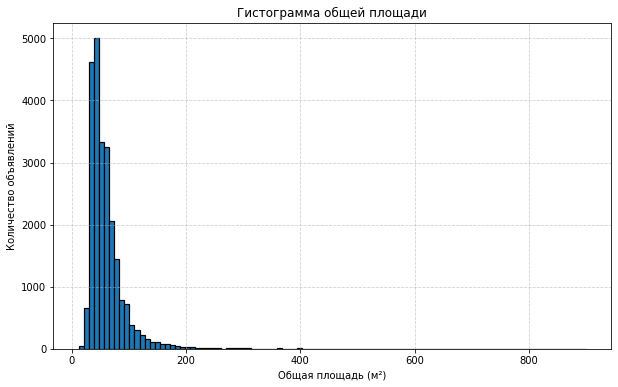

In [31]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data['total_area'].hist(bins=100, edgecolor='black', linewidth=1.2)
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма общей площади')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.show()

Вывод:
В основном в объявлениях представлены квартиры общей площадью от 30 до 60 м2

#### Площадь кухни

count    23699.000000
mean        10.254104
std          5.779020
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        112.000000
Name: kitchen_area, dtype: float64


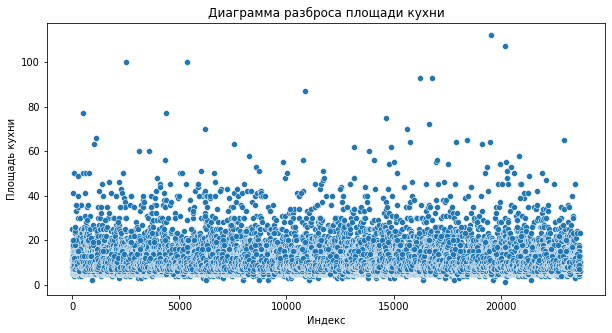

In [32]:
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
print(data['kitchen_area'].describe())

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['kitchen_area'])
plt.title('Диаграмма разброса площади кухни')
plt.xlabel('Индекс')
plt.ylabel('Площадь кухни')
plt.show()

In [33]:
# Подсчет количества объявлений по площади кухни
unique_areas = data['kitchen_area'].unique()
counts = {}
for area in unique_areas:
    count = data['kitchen_area'][data['kitchen_area'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for area, count in sorted_counts:
    print(f'Площадь кухни {area:.2f}: {count} объявлений')

Площадь кухни 8.00: 3430 объявлений
Площадь кухни 10.00: 2931 объявлений
Площадь кухни 6.00: 2917 объявлений
Площадь кухни 7.00: 2585 объявлений
Площадь кухни 9.00: 2476 объявлений
Площадь кухни 11.00: 1745 объявлений
Площадь кухни 5.00: 1607 объявлений
Площадь кухни 12.00: 1360 объявлений
Площадь кухни 13.00: 863 объявлений
Площадь кухни 14.00: 780 объявлений
Площадь кухни 15.00: 648 объявлений
Площадь кухни 16.00: 383 объявлений
Площадь кухни 17.00: 271 объявлений
Площадь кухни 18.00: 211 объявлений
Площадь кухни 20.00: 208 объявлений
Площадь кухни 19.00: 161 объявлений
Площадь кухни 22.00: 112 объявлений
Площадь кухни 21.00: 104 объявлений
Площадь кухни 23.00: 93 объявлений
Площадь кухни 25.00: 86 объявлений
Площадь кухни 4.00: 76 объявлений
Площадь кухни 30.00: 71 объявлений
Площадь кухни 24.00: 65 объявлений
Площадь кухни 26.00: 47 объявлений
Площадь кухни 28.00: 46 объявлений
Площадь кухни 35.00: 36 объявлений
Площадь кухни 27.00: 34 объявлений
Площадь кухни 40.00: 33 объявлений


Скорее всего 1 м2 - это ошибка. Посмотрим что это за объявление.

In [34]:
pd.set_option('display.max_columns', None)
filtered_data = data[data['kitchen_area'] == 1.0]
display(filtered_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
20217,7,4250000,28,2019-05-01,1,2.8,14,19.5,10,False,False,False,1,0,Санкт-Петербург,37199,12721,0,NaN,0,NaN,0,151785.71,2,5,2019,другой,13.0


In [35]:
# теперь посмотрим объявления с общей площадью 28м2
filtered_data2 = data[data['total_area'] == 28]
print(filtered_data2['kitchen_area'].describe())

count    122.000000
mean       6.245902
std        1.362493
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       13.000000
Name: kitchen_area, dtype: float64


In [36]:
# заменим 1м2 на медианное значение
# вычислим среднее значение для столбца 'kitchen_area' в filtered_data2
mean_kitchen_area = filtered_data2['kitchen_area'].mean()

# найдем индексы строк, где 'kitchen_area' == 1
indices = data[data['kitchen_area'] == 1].index

# заменим значение 'kitchen_area' на среднее значение для найденных индексов
data.loc[indices, 'kitchen_area'] = mean_kitchen_area
print(data.loc[indices, 'kitchen_area'])

20217    6.245902
Name: kitchen_area, dtype: float64


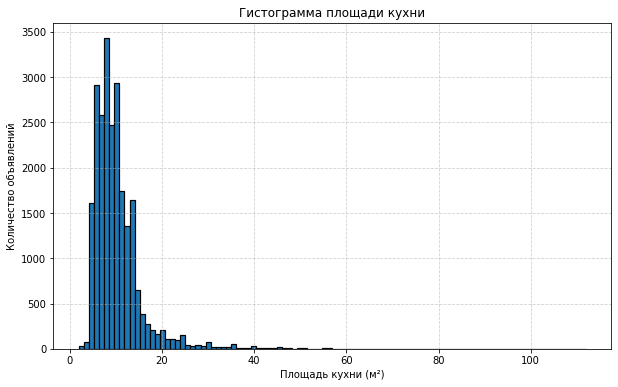

In [37]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data['kitchen_area'].hist(bins=100, edgecolor='black', linewidth=1.2)
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма площади кухни')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Вывод:
В большинстве объявлений площадь кухни 8 - 12 м2.

#### Цена объекта

count               23,699.0
mean     6,541,548.771551542
std      10,887,013.26754464
min                 12,190.0
25%              3,400,000.0
50%              4,650,000.0
75%              6,800,000.0
max            763,000,000.0
Name: last_price, dtype: object


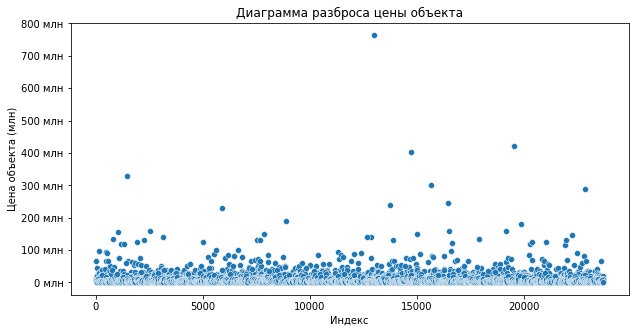

In [38]:
import matplotlib.ticker as mticker
# Первым шагом построим Диаграмму разброса, чтобы визуально оценить распределение данных.
print(data['last_price'].describe().apply(lambda x: '{:,}'.format(x)))

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['last_price'])

# Форматируем ось Y в миллионах
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + ' млн'))

plt.title('Диаграмма разброса цены объекта')
plt.xlabel('Индекс')
plt.ylabel('Цена объекта (млн)')
plt.show()

Давайте проверим сильно выбивающееся значение 763 млн

In [39]:
filtered_data3 = data[data['last_price'] == 763000000]
display(filtered_data3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
12971,19,763000000,400,2017-09-30,7,2.65,10,250.0,10,False,False,False,45.0,2,Санкт-Петербург,25108,3956,1,530.0,3,756.0,33,1907500.0,5,9,2017,последний,4.0


В принципе квартира 400 м2 недалеко от центра например в элитном доме может столько стоить.
Посмотрим объявления где стоимость ниже 100000 рублей.

In [40]:
filtered_data4 = data[data['last_price'] <= 100000]
display(filtered_data4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
8793,7,12190,109,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.0,0,Санкт-Петербург,36421,9176,1,805.0,0,NaN,8,111.83,2,3,2019,последний,9.0


In [41]:
# Заменим на медианное значение квартир площадью 109 м2
# Фильтруем DataFrame по условию 'total_area' == 109
filtered_data4 = data[data['total_area'] == 109]

# Вычисляем медианное значение для столбца 'last_price'
median_109_price = filtered_data4['last_price'].median()

# Выводим медианное значение
print("Медианная цена для объектов с общей площадью 109 кв.м.:", median_109_price)

# Индекс объявления с ошибочной ценой
index_wrong_price = 8793

# Заменяем ошибочную цену на медианное значение
data.loc[index_wrong_price, 'last_price'] = median_109_price

# Выводим измененную строку
display(data.loc[index_wrong_price])


Медианная цена для объектов с общей площадью 109 кв.м.: 13500000.0


total_images                                 7
last_price                          13500000.0
total_area                                 109
first_day_exposition       2019-03-20 00:00:00
rooms                                        2
ceiling_height                            2.75
floors_total                                25
living_area                               32.0
floor                                       25
is_apartment                             False
studio                                   False
open_plan                                False
kitchen_area                              40.0
balcony                                      0
locality_name                  Санкт-Петербург
airports_nearest                         36421
city_centers_nearest                      9176
parks_around3000                             1
parks_nearest                            805.0
ponds_around3000                             0
ponds_nearest                              NaN
days_expositi

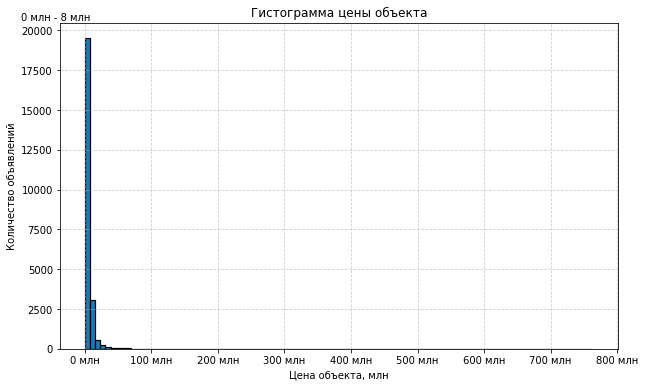

In [42]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['last_price'], bins=100, edgecolor='black', linewidth=1.2)

# Форматирование оси X в миллионах
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + ' млн'))

# Находим максимальный бин
max_bin_index = n.argmax()
max_bin_range = [bins[max_bin_index], bins[max_bin_index + 1]]

# Форматируем диапазон максимального бинa
max_bin_range_str = f'{max_bin_range[0] / 1000000:.0f} млн - {max_bin_range[1] / 1000000:.0f} млн'

# Добавляем текст к максимальному бину
plt.text(max_bin_range[1], n.max() * 1.05, max_bin_range_str, ha='right', va='bottom')

plt.xlabel('Цена объекта, млн')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма цены объекта')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Вывод:
Основное количество объявлений с ценой до 8 млн.

#### Тип этажа квартиры

In [43]:
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


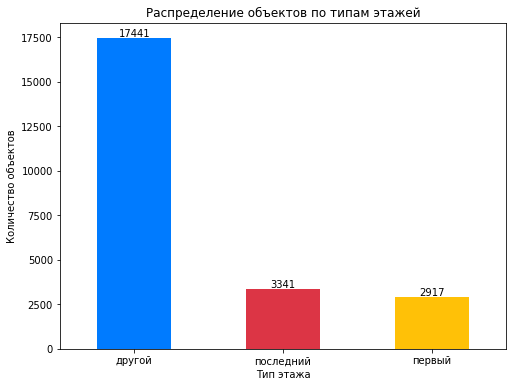

In [44]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 6))
floor_type_counts = data['floor_type'].value_counts()
floor_type_counts.plot(kind='bar', color=['#007bff', '#dc3545', '#ffc107']) 
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по типам этажей')
plt.xticks(rotation=0)  # Убираем поворот меток оси X

# Выводим значения над столбцами
for i, v in enumerate(floor_type_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

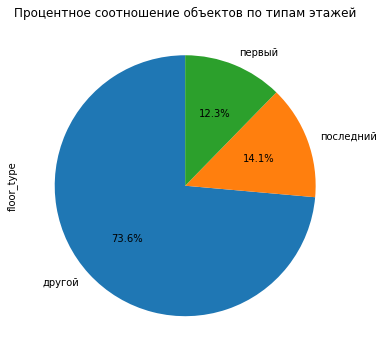

In [45]:
# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
data['floor_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Процентное соотношение объектов по типам этажей')
plt.show()

Вывод:
Т.к. последних и первых этажей в доме меньше,чем промежуточных и соответственно кол-во объявлений с квартирами с данным типом этажей меньше.

#### Общее количество этажей в доме

In [46]:
print(data['floors_total'].describe())


count    23699.00000
mean        10.67007
std          6.58781
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64


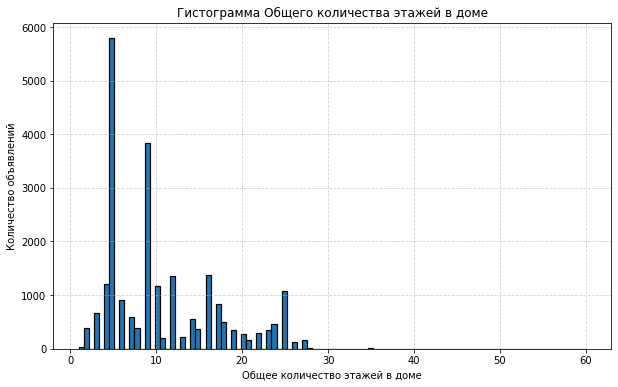

In [47]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data['floors_total'].hist(bins=100, edgecolor='black', linewidth=1.2)
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма Общего количества этажей в доме')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [48]:
# Подсчет количества объявлений по Общему количеству этажей в доме
unique_areas = data['floors_total'].unique()
counts = {}
for area in unique_areas:
    count = data['floors_total'][data['floors_total'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

# Вывод результата
for area, count in sorted_counts:
    print(f'Общее количество этажей в доме {area:.2f}: {count} объявлений')

Общее количество этажей в доме 5.00: 5789 объявлений
Общее количество этажей в доме 9.00: 3832 объявлений
Общее количество этажей в доме 16.00: 1377 объявлений
Общее количество этажей в доме 12.00: 1363 объявлений
Общее количество этажей в доме 4.00: 1201 объявлений
Общее количество этажей в доме 10.00: 1174 объявлений
Общее количество этажей в доме 25.00: 1075 объявлений
Общее количество этажей в доме 6.00: 918 объявлений
Общее количество этажей в доме 17.00: 834 объявлений
Общее количество этажей в доме 3.00: 668 объявлений
Общее количество этажей в доме 7.00: 592 объявлений
Общее количество этажей в доме 14.00: 553 объявлений
Общее количество этажей в доме 18.00: 507 объявлений
Общее количество этажей в доме 24.00: 469 объявлений
Общее количество этажей в доме 8.00: 390 объявлений
Общее количество этажей в доме 2.00: 383 объявлений
Общее количество этажей в доме 15.00: 365 объявлений
Общее количество этажей в доме 23.00: 352 объявлений
Общее количество этажей в доме 19.00: 343 объяв

Вывод:
Видим, что большинство объявлений с квартирамив домах 5 и 9 этажей. Это можно объяснить тем, что большинство объявлений это квартиры в домах, построеных в советский период, которые как раз имеют типовую этажность 5 и 9 этажей.

#### Расстояние до центра города в метрах

In [49]:
print(data['city_centers_nearest'].describe())

count    23699.000000
mean     11510.455547
std       9630.144895
min          0.000000
25%       3877.000000
50%      11746.000000
75%      15743.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64


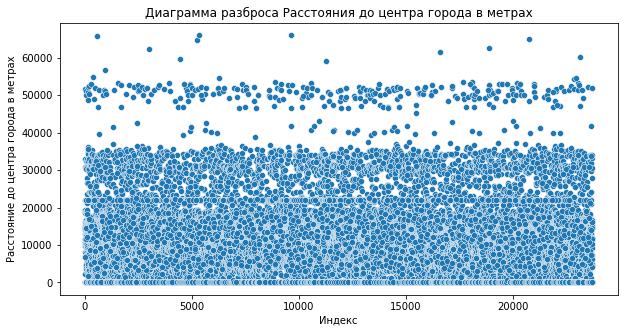

In [50]:
# Построим Диаграмму разброса, чтобы визуально оценить распределение данных.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['city_centers_nearest'])
plt.title('Диаграмма разброса Расстояния до центра города в метрах')
plt.xlabel('Индекс')
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

В крупных городах новые районы от центра могут находится на большом удалении, поэтому оставим данные без изменений.

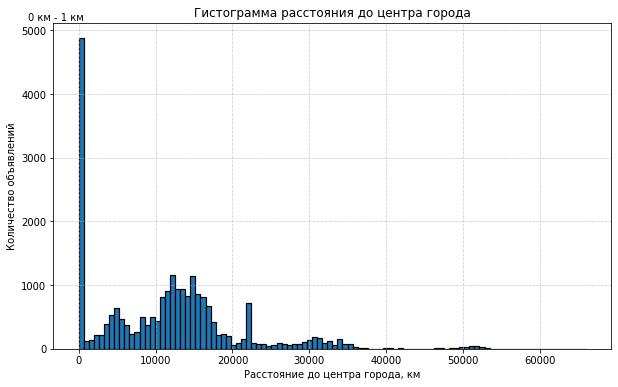

In [51]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['city_centers_nearest'], bins=100, edgecolor='black', linewidth=1.2)

# Находим максимальный бин
max_bin_index = n.argmax()
max_bin_range = [bins[max_bin_index], bins[max_bin_index + 1]]

# Форматируем диапазон максимального бинa
max_bin_range_str = f'{max_bin_range[0] / 1000:.0f} км - {max_bin_range[1] / 1000:.0f} км' 

# Добавляем текст к максимальному бину
plt.text(max_bin_range[1], n.max() * 1.05, max_bin_range_str, ha='right', va='bottom')

plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма расстояния до центра города')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

По гистограмме видно большое кол-во объявлений со значением 0. Скорее всего по этому параметру в объявлении просто отсутствует информация. Исключим объяления со значением 0 из нашего анализа. 

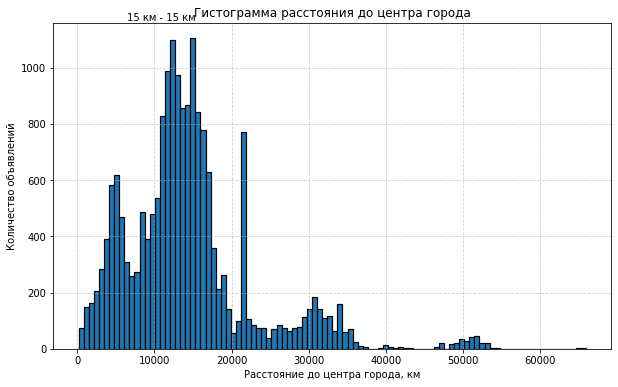

In [52]:
# Создаем копию датафрейма
data_filtered_ccn = data.copy()

# Удаляем строки, где city_centers_nearest == 0
data_filtered_ccn = data_filtered_ccn[data_filtered_ccn['city_centers_nearest'] != 0]

# Построение гистограммы
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data_filtered_ccn['city_centers_nearest'], bins=100, edgecolor='black', linewidth=1.2)

# Находим максимальный бин
max_bin_index = n.argmax()
max_bin_range = [bins[max_bin_index], bins[max_bin_index + 1]]

# Форматируем диапазон максимального бинa
max_bin_range_str = f'{max_bin_range[0] / 1000:.0f} км - {max_bin_range[1] / 1000:.0f} км' 

# Добавляем текст к максимальному бину
plt.text(max_bin_range[1], n.max() * 1.05, max_bin_range_str, ha='right', va='bottom')

plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма расстояния до центра города')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [53]:
# Создадим столбец с категориями
data_filtered_ccn['distance_category'] = pd.cut(data_filtered_ccn['city_centers_nearest'], bins=[0, 10000, 20000, 30000], labels=['0-10000', '10000-20000', '20000-30000'], include_lowest=True)

# Сгруппируем данные по категориям и посчитайте количество объявлений
grouped = data_filtered_ccn.groupby('distance_category').size()

# Вычислим процент от общего количества объявлений
percentage = grouped / len(data_filtered_ccn) * 100

print(percentage)

distance_category
0-10000        27.053524
10000-20000    55.707472
20000-30000    10.021198
dtype: float64


Вывод: Большая часть объявлений, 55% - это квартиры  на расстоянии от центра в пределах 10 - 20 километров, где находятся спальные районы населенных пунктов.

#### Расстояние до ближайшего парка

In [54]:
print(data['parks_nearest'].describe())

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


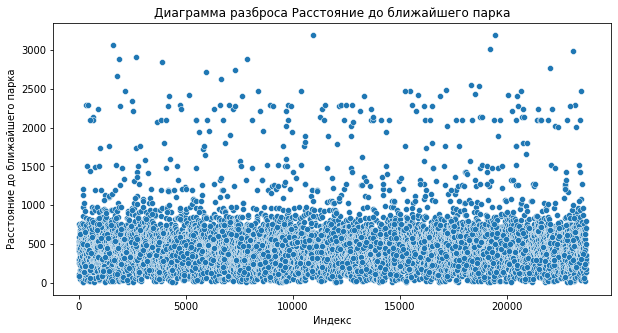

In [55]:
# Построим Диаграмму разброса, чтобы визуально оценить распределение данных.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['parks_nearest'])
plt.title('Диаграмма разброса Расстояние до ближайшего парка')
plt.xlabel('Индекс')
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

Оставим данные без изменений.

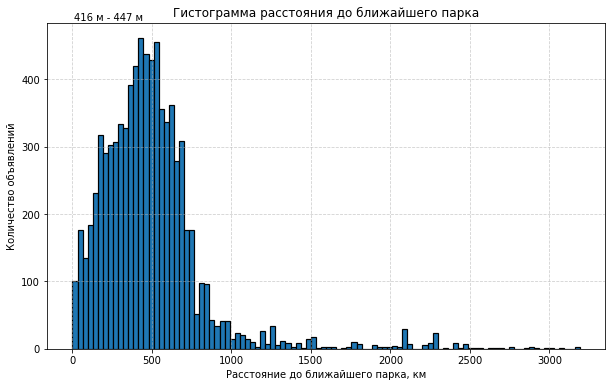

In [56]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['parks_nearest'], bins=100, edgecolor='black', linewidth=1.2)

# Находим максимальный бин
max_bin_index = n.argmax()
max_bin_range = [bins[max_bin_index], bins[max_bin_index + 1]]

# Форматируем диапазон максимального бинa
max_bin_range_str = f'{max_bin_range[0]:.0f} м - {max_bin_range[1]:.0f} м' 

# Добавляем текст к максимальному бину
plt.text(max_bin_range[1], n.max() * 1.05, max_bin_range_str, ha='right', va='bottom')

plt.xlabel('Расстояние до ближайшего парка, км')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма расстояния до ближайшего парка')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Вывод:
Можно сделать вывод, что рядом с квартирами в непосредственной близости, в среднем не дальше 500м, всегда есть парк.

#### Изучите, как быстро продавались квартиры
Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. Постройте гистограмму. Посчитайте среднее и медиану. В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

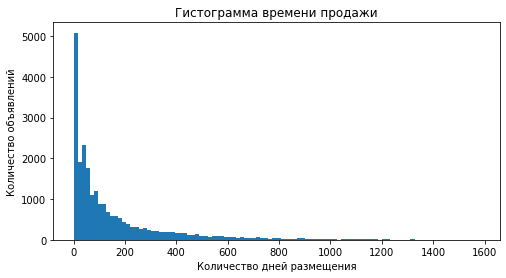

Среднее время продажи: 156.61 дней
Медиана времени продажи: 74.00 дней


In [57]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(data['days_exposition'], bins=100)
plt.title('Гистограмма времени продажи')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество объявлений')
plt.show()

# Среднее и медиана
mean_days_exposition = data['days_exposition'].mean()
median_days_exposition = data['days_exposition'].median()

print(f'Среднее время продажи: {mean_days_exposition:.2f} дней')
print(f'Медиана времени продажи: {median_days_exposition:.2f} дней')

In [58]:
# Подсчет количества объявлений по сколько дней было размещено каждое объявление
unique_areas = data['days_exposition'].unique()
counts = {}
for area in unique_areas:
    count = data['days_exposition'][data['days_exposition'] == area].count()
    counts[area] = count

# Сортировка по кол-ву объявлений
sorted_counts = sorted(counts.items(), key=lambda item: item[0], reverse=False)

# Вывод результата
for area, count in sorted_counts:
    print(f'Сколько дней было размещено каждое объявление {area:.2f}: {count} объявлений')

Сколько дней было размещено каждое объявление 0.00: 3181 объявлений
Сколько дней было размещено каждое объявление 1.00: 1 объявлений
Сколько дней было размещено каждое объявление 2.00: 3 объявлений
Сколько дней было размещено каждое объявление 3.00: 158 объявлений
Сколько дней было размещено каждое объявление 4.00: 176 объявлений
Сколько дней было размещено каждое объявление 5.00: 152 объявлений
Сколько дней было размещено каждое объявление 6.00: 124 объявлений
Сколько дней было размещено каждое объявление 7.00: 234 объявлений
Сколько дней было размещено каждое объявление 8.00: 139 объявлений
Сколько дней было размещено каждое объявление 9.00: 143 объявлений
Сколько дней было размещено каждое объявление 10.00: 127 объявлений
Сколько дней было размещено каждое объявление 11.00: 135 объявлений
Сколько дней было размещено каждое объявление 12.00: 108 объявлений
Сколько дней было размещено каждое объявление 13.00: 128 объявлений
Сколько дней было размещено каждое объявление 14.00: 148 объя

Что можно сказать про параметр после первого рассмотрения?
1. На данный момент медианное значение 74 дня, это означает что половина всех квартир в период до двух с половиной месяцев.
2. Среднее значение 156,61 дней говорит нам о том, что в среднем квартиры продаются за 5 месяцев. Но данное значение мы не можем считать достоверным, т.к. на него оказывает влияние очень большое кол-во объявлений со значением 0 и достаточно много объявлений со сроком объявления больше года.

In [59]:
filtered_data5 = data[data['days_exposition'] == 0]
display(filtered_data5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.0
45,17,5200000.0,50,2018-12-02,2,2.65,9,30.300000,7,False,False,False,7.0,0,Санкт-Петербург,30011,12872,0,NaN,0,NaN,0,104000.00,6,12,2018,другой,13.0
46,17,6600000.0,52,2019-01-31,2,2.60,24,29.700000,9,False,False,False,8.0,2,Санкт-Петербург,15114,12702,0,NaN,0,NaN,0,126923.08,3,1,2019,другой,13.0
49,1,3050000.0,30,2018-11-22,1,2.50,9,18.000000,7,False,False,False,6.0,0,Санкт-Петербург,45341,16603,1,675.0,0,NaN,0,101666.67,3,11,2018,другой,17.0
52,20,11795000.0,136,2017-09-22,6,3.00,2,94.000000,2,False,False,False,11.0,1,Санкт-Петербург,16510,6582,1,526.0,0,NaN,0,86727.94,4,9,2017,последний,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22131,14,27000000.0,422,2018-10-18,5,2.70,13,215.382898,11,False,False,False,47.0,0,Санкт-Петербург,46625,16554,0,NaN,0,NaN,0,63981.04,3,10,2018,другой,17.0
22152,7,18130500.0,71,2019-04-19,2,2.65,4,38.984333,4,False,False,False,11.0,0,Санкт-Петербург,23679,3245,0,NaN,1,777.0,0,255359.15,4,4,2019,последний,3.0
22330,6,4000000.0,43,2018-03-18,2,2.60,9,26.365663,2,False,False,False,8.0,0,Шушары,23177,28963,0,NaN,1,1050.0,0,93023.26,6,3,2018,другой,29.0
22661,6,3150000.0,24,2019-04-16,1,2.65,5,11.701440,3,False,False,False,6.0,0,Санкт-Петербург,26737,5235,1,359.0,1,964.0,0,131250.00,1,4,2019,другой,5.0


In [60]:
filtered_data6 = data[data['days_exposition'] >= 1000]
display(filtered_data6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
109,2,7497600.0,62,2015-12-08,2,2.65,5,35.500000,5,False,False,False,9.0,0,Пушкин,14517,26670,1,517.0,0,NaN,1048,120929.03,1,12,2015,последний,27.0
353,4,5990000.0,43,2015-05-08,1,3.00,5,25.000000,4,False,False,False,9.0,0,Санкт-Петербург,10527,10278,1,93.0,0,NaN,1292,139302.33,4,5,2015,другой,10.0
398,7,12789000.0,79,2014-12-09,2,3.00,8,43.100000,5,False,False,False,17.0,0,Санкт-Петербург,39393,11096,1,537.0,0,NaN,1345,161886.08,1,12,2014,другой,11.0
437,12,3350000.0,37,2015-02-24,1,2.55,6,17.800000,6,False,False,False,8.0,0,Петергоф,46151,34044,1,185.0,1,755.0,1273,90540.54,1,2,2015,последний,34.0
459,13,5200000.0,51,2016-03-02,2,2.55,9,32.000000,5,False,False,False,6.0,0,Санкт-Петербург,48522,16360,0,NaN,0,NaN,1153,101960.78,2,3,2016,другой,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,11,3695000.0,35,2015-11-16,1,2.60,12,16.658775,2,False,False,False,7.0,0,Санкт-Петербург,31520,12113,0,NaN,0,NaN,1058,105571.43,0,11,2015,другой,12.0
11533,11,13500000.0,136,2015-10-21,3,2.65,4,74.289094,2,False,False,False,18.0,0,Санкт-Петербург,22788,2329,0,NaN,0,NaN,1089,99264.71,2,10,2015,другой,2.0
12739,5,9150000.0,46,2015-10-02,1,2.65,9,21.616109,5,False,False,False,9.0,0,Санкт-Петербург,39412,10186,1,1424.0,3,204.0,1151,198913.04,4,10,2015,другой,10.0
15313,1,9278000.0,139,2014-12-28,4,2.80,5,82.058115,4,False,False,False,18.0,0,Сестрорецк,54416,35515,0,NaN,0,NaN,1489,66748.20,6,12,2014,другой,36.0


В объявления со значением 0 - это объявления не снятые с публикации, соответственно в анализе параметра эти объявления участвовать не должны и мы их не будем учитывать.
Что касается объявлений с очень большой продолжительностью продажи, если посмотреть на дату публикации, видно что с 2014, 2015 года объявления действительно могут иметь такую продолжительность размещения. Можно предположить что это квартиры с какими то юридическими ограничениями и нам в нашем анализе такие квартиры тоже не нужны. Поэтому сделаем выборку по продолжительности размещенияя объявления больше 0 и меньше 512 дней (убрав выбросы) и найдем медиану и среднее.

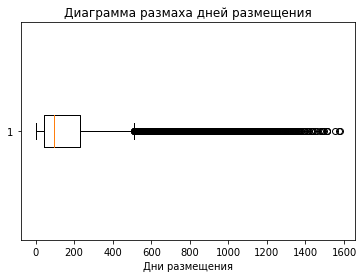

IQR: 187.0
Нижняя граница: -235.5
Верхняя граница: 512.5


In [61]:
# Создаем копию датафрейма
data_filtered = data.copy()

# Удаляем объявления с 0 днями размещения
data_filtered = data_filtered[data_filtered['days_exposition'] != 0]

# Визуализация
plt.boxplot(data_filtered['days_exposition'], vert=False)
plt.title('Диаграмма размаха дней размещения')
plt.xlabel('Дни размещения')
plt.show()

# Статистические методы
Q1 = data_filtered['days_exposition'].quantile(0.25)
Q3 = data_filtered['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод результатов
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

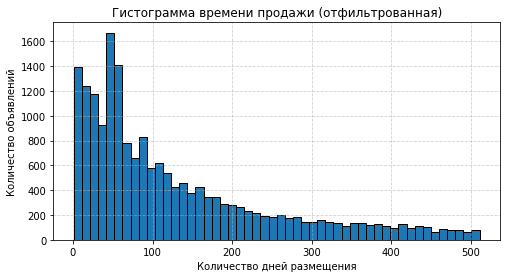

Медиана времени продажи: 85.00 дней
Среднее время продажи: 128.65 дней


In [62]:
# Удаляем объявления с продолжительностью размещения больше 366 дней 
data_filtered = data_filtered[data_filtered['days_exposition'] < 512]

# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(data_filtered['days_exposition'], bins=50, edgecolor='black', linewidth=1) 
plt.title('Гистограмма времени продажи (отфильтрованная)')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество объявлений')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Вычисляем медиану и среднее
median_days_exposition = data_filtered['days_exposition'].median()
mean_days_exposition = data_filtered['days_exposition'].mean()

print(f'Медиана времени продажи: {median_days_exposition:.2f} дней')
print(f'Среднее время продажи: {mean_days_exposition:.2f} дней')

Вывод:
Медианное значение не изменилось половина всех квартир продается в течении 85 дней (3 месяца). 
Среднее знчение составляет 129 дней (4 месяца).
Поэтому можем в общем сказать, что квартиры продаются за 3-4 месяца.
Насчет быстрых и долгих продаж. Чтобы как-то обосновать данные категории математически, можно рассчитать квартили, гд е первый квартиль можно назвать быстрыми продажами, а последний долгими. Быстрыми продажами можно назвать продажи до 45 дней со дня публикации объвления, долгими - больше 232 дней.

In [63]:
# Рассчитываем квартили
q1 = data_filtered['days_exposition'].quantile(0.25)
q2 = data_filtered['days_exposition'].quantile(0.50)
q3 = data_filtered['days_exposition'].quantile(0.75)

print(f"Быстрые продажи - до {q1:.2f} дней")
print(f"Долгие продажи - больше {q3:.2f} дней") 

Быстрые продажи - до 41.00 дней
Долгие продажи - больше 182.00 дней


#### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

<Figure size 720x288 with 0 Axes>

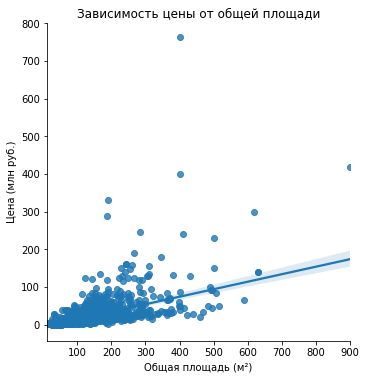

In [64]:
# 1. Зависимость цены от общей площади
# Диаграма разброса с линией регрессии, чтобы отобразить линейную зависимость цены от общей площади
data['price_mln'] = data['last_price'] / 1000000

plt.figure(figsize=(10, 4))
sns.lmplot(x='total_area', y='price_mln', data=data)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена (млн руб.)')
plt.show()

На диаграмме видим что цена зависит от общей площади квартиры в объвлениях.
Попробуем показать эту зависимость, через расчет коэффициента регрессии.

In [65]:
import statsmodels.formula.api as sm

# Формула регрессии: цена ~ площадь
model = sm.ols('price_mln ~ total_area', data=data)
results = model.fit()

# Вывод результатов регрессии
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_mln   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 1.768e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:59   Log-Likelihood:                -83604.
No. Observations:               23699   AIC:                         1.672e+05
Df Residuals:                   23697   BIC:                         1.672e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4549      0.105    -52.004      0.0

***Вывод:***
<br>
*Цена на квартиры зависит от общей площади. При увеличении площади на 1м2 цена увеличивается примерно на 199600 рублей. R-squared нам говорит, что 42,7% изменения цены квартир можно объяснить изменением общей площади.*

<Figure size 720x288 with 0 Axes>

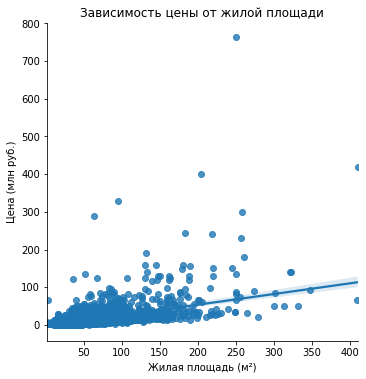

In [66]:
# 2. Зависимость цены от жилой площади
plt.figure(figsize=(10, 4))
sns.lmplot(x='living_area', y='price_mln', data=data)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Цена (млн руб.)')
plt.show()

In [67]:
# Формула регрессии: цена ~ площадь
model2 = sm.ols('price_mln ~ living_area', data=data)
results2 = model2.fit()

# Вывод результатов регрессии
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_mln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:41:01   Log-Likelihood:                -85324.
No. Observations:               23699   AIC:                         1.707e+05
Df Residuals:                   23697   BIC:                         1.707e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.2754      0.106    -30.839      

***Вывод:***
<br>
*Видим большую зависимость цены от жилой площади, чем от общей площади. При увеличении жилой площади на 1м2 цена увеличивается примерно на 284000 рублей.*

<Figure size 720x288 with 0 Axes>

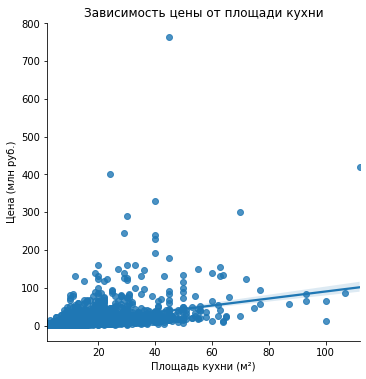

In [68]:
# 3. Зависимость цены от площади кухни
plt.figure(figsize=(10, 4))
sns.lmplot(x='kitchen_area', y='price_mln', data=data)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Цена (млн руб.)')
plt.show()

In [69]:
# Формула регрессии: цена ~ площадь
model3 = sm.ols('price_mln ~ kitchen_area', data=data)
results3 = model3.fit()

# Вывод результатов регрессии
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_mln   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     7645.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:41:03   Log-Likelihood:                -86897.
No. Observations:               23699   AIC:                         1.738e+05
Df Residuals:                   23697   BIC:                         1.738e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.9992      0.125    -23.944   

***Вывод:***
<br>
*При увеличении площади кухни на 1м2 цена увеличивается примерно на 930500 рублей. Но скорее площадь кухни влияет отчасти. Чем большую площадь имеет квартира, тем выше цена. А в квартирах болшей площади и кухни имеют большую площадь.*

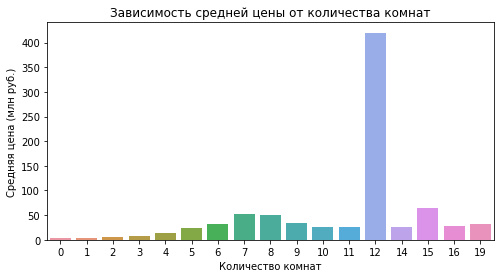

In [70]:
# 4. Зависимость цены от количества комнат
pivot_table_rooms = pd.pivot_table(data, values='price_mln', index='rooms', aggfunc='mean')

plt.figure(figsize=(8, 4))
sns.barplot(x=pivot_table_rooms.index, y=pivot_table_rooms['price_mln'])
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (млн руб.)')
plt.title('Зависимость средней цены от количества комнат')
plt.show()

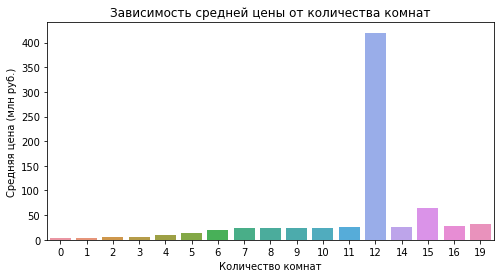

In [71]:
pivot_table_rooms = pd.pivot_table(data, values='price_mln', index='rooms', aggfunc='median')

plt.figure(figsize=(8, 4))
sns.barplot(x=pivot_table_rooms.index, y=pivot_table_rooms['price_mln'])
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (млн руб.)')
plt.title('Зависимость средней цены от количества комнат')
plt.show()

***Вывод:***
<br>
*Видим что цена зависит от количества комнат до определенного значения. Чем больше комнат, тем как правило больше площадь и выше цена. После значения кол-ва комнат равное 7 зависимость от кол-ва комнат пропадает и дальше цена зависит уже от других параметров.*

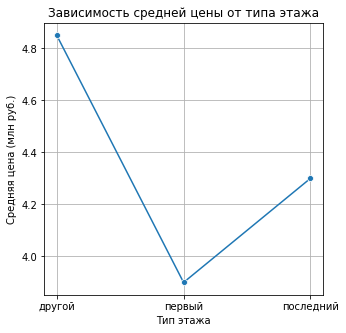

In [72]:
# 5. Зависимость цены от этажа

pivot_table_floor_type = data.pivot_table(index='floor_type', values='price_mln', aggfunc='median') #тут поставил median, т.к. по умолчанию aggfunc='mean' очень чувствительна к выбросам

plt.figure(figsize=(5, 5))
sns.lineplot(x=pivot_table_floor_type.index, y=pivot_table_floor_type['price_mln'], marker='o') 
plt.title('Зависимость средней цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (млн руб.)')
plt.grid(True)
plt.show()

***Вывод:***
<br>
*Тип этажа также влияет на цену квартир. Если тип этажа не первый и не последний, цена на квартиру выше.*

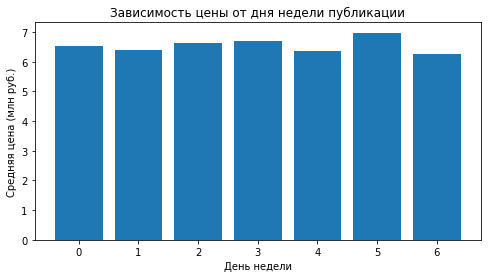

In [73]:
# 6. Зависимость цены от дня недели публикации
pivot_table_weekday = data.pivot_table(index='weekday_exposition', values='price_mln', aggfunc='mean')
plt.figure(figsize=(8, 4))
plt.bar(pivot_table_weekday.index, pivot_table_weekday['price_mln'])
plt.title('Зависимость цены от дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Средняя цена (млн руб.)')
plt.xticks(rotation=0) # поворот подписей по оси х
plt.show()

***Вывод:***
<br>
*Как видим из диаграммы день недели публикации не влияет на цену квартиры.*

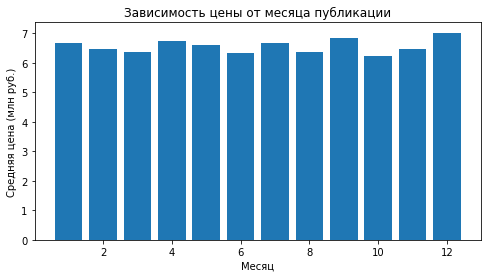

In [74]:
# 7. Зависимость цены от месяца публикации
pivot_table_month = data.pivot_table(index='month_exposition', values='price_mln', aggfunc='mean')
plt.figure(figsize=(8, 4))
plt.bar(pivot_table_month.index, pivot_table_month['price_mln'])
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена (млн руб.)')
plt.show()

***Вывод:***
<br>
*Как видим из диаграммы месяц публикации не влияет на цену квартиры.*

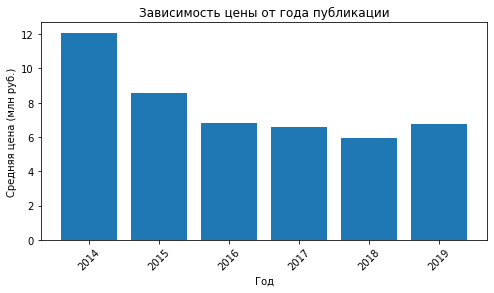

In [75]:
# 8. Зависимость цены от года публикации
pivot_table_year = data.pivot_table(index='year_exposition', values='price_mln', aggfunc='mean')
plt.figure(figsize=(8, 4))
plt.bar(pivot_table_year.index, pivot_table_year['price_mln'])
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год')
plt.ylabel('Средняя цена (млн руб.)')
plt.xticks(rotation=45)
plt.show()

***Вывод:***
<br>
*Как видим из диаграммы цена зависит от года публикации. На это может влиять состояние рынка в каждом году. Максимальная цена в 2014 году, а дальше понижение цен каждый последующий год вплоть до 2019 года. В 2019 году видим рост цен до уроаня 2017 года.*

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [76]:
# 1. Сгруппируем данные по населённым пунктам и посчитаем количество объявлений
top_10_localities = data['locality_name'].value_counts().nlargest(10).index

# 2. Создадим сводную таблицу
pivot_table = data.query('locality_name in @top_10_localities').pivot_table(
    index='locality_name', 
    values=['last_price', 'total_area'], 
    aggfunc={'last_price': 'mean', 'total_area': 'mean'}
)

# 3. Рассчитаем среднюю цену за квадратный метр
pivot_table['price_per_square_meter'] = round(pivot_table['last_price'] / pivot_table['total_area'], 2)

# 4. Сортируем таблицу по цене за квадратный метр
pivot_table = pivot_table.sort_values('price_per_square_meter', ascending=False)

# 5. Вывод таблицы
display(pivot_table.style.format({'last_price': '{:.0f}', 'price_per_square_meter': '{:.2f}'}))

# print(f'\n\033[1mВывод:\033[0m') 

# 6. Вывод населенного пункта с самой высокой ценой за квадратный метр
print(f'\nНаселенный пункт с самой высокой ценой за квадратный метр: {pivot_table.index[0]}')
print(f'Цена за квадратный метр: {pivot_table.iloc[0]["price_per_square_meter"]}')

# 7. Вывод населенного пункта с самой низкой ценой за квадратный метр
print(f'\nНаселенный пункт с самой низкой ценой за квадратный метр: {pivot_table.index[-1]}')
print(f'Цена за квадратный метр: {pivot_table.iloc[-1]["price_per_square_meter"]}')

,last_price,total_area,price_per_square_meter
locality_name,,,
Санкт-Петербург,8063365,64.522422,124969.97
Пушкин,6469036,61.322493,105492.06
Кудрово,4358688,46.146186,94453.92
Парголово,4488075,51.275229,87529.10
Мурино,3678462,43.818644,83947.42
Шушары,4108082,53.590909,76656.32
Колпино,3964021,53.041420,74734.45
Гатчина,3488337,50.752443,68732.39
Всеволожск,3789068,55.778894,67930.13



Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург
Цена за квадратный метр: 124969.97

Населенный пункт с самой низкой ценой за квадратный метр: Выборг
Цена за квадратный метр: 58018.3


Вывод:

Самая высокая цена за квадратный метр в Санкт-Петербурге. Это обусловлено тем, что СПб является столицей региона, отсюда и максимальная цена. Дальше идут пригороды Санкт-Петербурга и города спутники, которые находятся вблизи главного города региона, сильно связаны экономически с СПб из-за близости и позволяют также ездить населентю этих городов ездить на работу в Санкт-Петербург. Минимальная цена за кавдратный метр в Выборге. Это объясняется большим расстоянием от Санкт-Петербурга. Чем дальше расстояние от СПб, тем ниже цена.


#### Вычислите их среднюю стоимость на разном удалении от центра.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

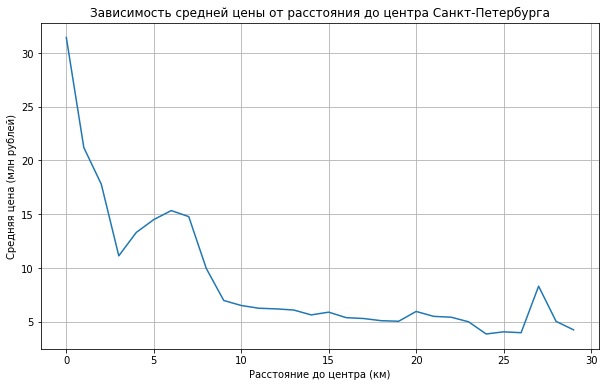

In [77]:
# 1. Выделим квартиры в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# 2. Создадим сводную таблицу по расстоянию до центра
pivot_table = spb_data.pivot_table(
    index='city_centers_nearest_km', 
    values='price_mln',
    aggfunc='mean'
)

# 3. Постром график зависимости цены от расстояния до центра
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table['price_mln'])
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (млн рублей)')
plt.grid(True)
plt.show()

***Вывод:***
<br>
- стоимость квартир в Санкт-Петербурге уменьшается с увеличением расстояния до центра
- наибольшая средняя цена наблюдается в районе центра
- средняя цена постепенно снижается с увеличением расстояния от центра

In [78]:
filtered_distance = data[(data['city_centers_nearest_km'] == 27) & (data['locality_name'] == 'Санкт-Петербург')]
display(filtered_distance)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,price_mln
748,13,14350000.0,74,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888,27313,1,1496.0,0,NaN,128,193918.92,1,11,2017,другой,27.0,14.35
5961,6,2250000.0,32,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006,27431,0,NaN,0,NaN,178,70312.50,1,2,2018,последний,27.0,2.25


### Общий вывод

#### Описание проекта
Целью данного исследовательского проекта является анализ данных о рынке недвижимости Ленинградской области. В качестве исходных данных был использован набор данных от Яндекс Недвижимость с 23699 записями, содержащий информацию о предложениях квартир на рынке недвижимости.

#### Цель проекта
1. Провести глубокий анализ данных о недвижимости, чтобы выявить ключевые факторы, влияющие на стоимость объектов.
2. Определить закономерности в ценообразовании на рынке недвижимости Ленинградской области.
3. Изучить зависимость цены от различных параметров, таких как площадь, количество комнат, этаж, расстояние до центра города.

#### Предобработка данных
На первом этапе исследования была проведена предобработка данных. 

1. В столбце с названиями населенных пунктов locality_name были найдены неявные дубликаты. Они были устранены, приведя все названия к одному формату


2. Были обнаружены и заполнены пропуски в следующих столбцах:
- ceiling_height(высота потолков) - Заполнили медианным значением, т.к. высота потолков не сильно отличается в в большинстве квартир
- floors_total(этажей в доме) - Сгруппирован по населенному пункту и найдены медианные значения для каждого населенного пункта
- living_area(жилая площадь в квадратных метрах) - Использовали линейную регрессию от общей площади и количества комнат. Т.к. пропусков очень много, то мы не можеи просто так их оставить или поставить 0, т.к. это отразится на показателяи по этому полю. 
- is_apartment(апартаменты) - Заполнили все пропуски значением False. Здесь скорее всего если жилье не аппартаменты, поэтлму создатель объявления просто не ставил отметку.
- kitchen_area(площадь кухни в квадратных метрах) - точно также как и с жилой площадью Применили линейную регрессию от общей площади.
- balcony(число балконов) - Заполним пропуски значением 0. Все пропуски это отсутствие балкона. 
- airports_nearest(расстояние до ближайшего аэропорта в метрах) - Сгруппированы значения по населенному пункту и заполнены медианным значением
- city_centers_nearest(расстояние до центра города в метрах) - Сгруппированы значения по населенному пункту и заполнены медианным значением
- parks_around3000(число парков в радиусе 3 км) - Сгруппированы значения по населенному пункту и заполнены медианным значением
- parks_nearest(расстояние до ближайшего парка в метрах) - очень большое количество пропусков, если мы заполним их медианным или средним значением, то у нас образуется большой перекос в сторону этих значений. Поэтому мы не будем заменять пропуски, а оставим их как есть
- ponds_around3000(число водоёмов в радиусе 3 км) - сгруппируем значение по населенному пункту и заполним медианным значением
- ponds_nearest(расстояние до ближайшего водоёма в метрах) - очень большое количество пропусков, если мы заполним их медианным или средним значением, то у нас образуется большой перекос в сторону этих значений. Поэтому мы не будем заменять пропуски, а оставим их как есть
- days_exposition(сколько дней было размещено объявление (от публикации до снятия)) - скорее всего объявление еще не снято, поэтому заполнили пропуски значением 0.

3. Также были проверены типы данных в каждом столбце:
Тип данных в столбцах last_price, total_area, floors_total, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition был изменен на int64, в столбце is_apartment на bool, first_day_exposition на datetime64


4. Название столбца cityCenters_nearest было приведено в соответствие с остальными названиями и изменено на city_centers_nearest


#### Добавление новых столбцов

В таблицу были добавлены новые столбцы:

1. price_per_square_meter (цена одного квадратного метра)
2. weekday_exposition (день недели публикации объявления)
3. month_exposition (месяц публикации объявления)
4. year_exposition (год публикации объявления)
5. floor_type (тип этажа квартиры)
6. city_centers_nearest_km (расстояние до центра города в километрах)
7. price_mln (цена в млн рублях)

#### Исследовательский анализ данных

##### Анализ параметров объектов:

Были исследованы следующие параметры:
1. Общая площадь
2. Жилая площадь
3. Площадь кухни
4. Цена объекта
5. Количество комнат
6. Высота потолков
7. Тип этажа квартиры
8. Общее количество этажей в доме
9. Расстояние до центра города в метрах
10. Расстояние до ближайшего парка



По итогам иследования можно сделать следующий вывод:

Большинство объявлений это однокомнатные и двукомнатные квартиры с жилой площадью от 15 до 40 м2, общей площадью от 30 до 60 м2, площадью кухни 8 - 12 м2, с ценой до 8 млн, типом этажа "другой", в 5-ти и 9-ти этажных домах, на расстоянии  от центра в пределах 10 - 20 километров, на расстоянии до 500 м от ближайшего парка.


##### Анализ времени продажи:

Половина всех квартир продается в течении 85 дней (примерно 3 месяца). 
Среднее знчение составляет 129 дней (4 месяца).
Поэтому можем сказать, что квартиры продаются примерно за 3-4 месяца.
Быстрыми продажами можно назвать продажи до 45 дней со дня публикации объвления, медленными - больше 232 дней.

##### Факторы, влияющие на цену:

- Цена на квартиры зависит от общей площади. При увеличении площади на 1м2 цена увеличивается примерно на 199600 рублей. R-squared нам говорит, что 42,7% изменения цены квартир можно объяснить изменением общей площади.
- Также наблюдается еще большую зависимость цены от жилой площади, чем от общей площади. При увеличении жилой площади на 1м2 цена увеличивается примерно на 284000 рублей.
- При увеличении площади кухни на 1м2 цена увеличивается примерно на 930500 рублей. Но скорее площадь кухни влияет отчасти. Чем большую площадь имеет квартира, тем выше цена. А в квартирах болшей площади и кухни имеют большую площадь.
- Цена зависит от количества комнат до определенного значения. Чем больше комнат, тем как правило больше площадь и выше цена. После значения кол-ва комнат равное 7 зависимость от кол-ва комнат пропадает и дальше цена зависит уже от других параметров.
- День недели публикации не влияет на цену квартиры.
- Месяц публикации не влияет на цену квартиры.
- Цена зависит от года публикации. На это может влиять состояние рынка в каждом году. Максимальная цена в 2014 году, а дальше понижение цен каждый последующий год вплоть до 2019 года. В 2019 году видим рост цен до уроаня 2017 года.

##### Анализ стоимости квадратного метра в 10 населенных пунктах:

Десять городов в Ленинградской области с самой высокой ценой за квадратный метр:

<div align="left" style="width: 500px;">

|Наименование населенного пункта|Цена за квадратный метр|
|-------------------------------|-----------------------|
|Санкт-Петербург                |124969.97              |
|Пушкин                         |105492.06              |
|Кудрово                        |94453.92               |
|Парголово                      |87529.10               |
|Мурино                         |83947.42               |
|Шушары                         |76656.32               |
|Колпино                        |74734.45               |
|Гатчина                        |68732.39               |
|Всеволожск                     |67930.13               |
|Выборг                         |58018.30               |

</div>


Из них:

Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург
Цена за квадратный метр: 124969.97

Населенный пункт с самой низкой ценой за квадратный метр: Выборг
Цена за квадратный метр: 58018.3

Самая высокая цена за квадратный метр в Санкт-Петербурге. Это обусловлено тем, что СПб является столицей региона, отсюда и максимальная цена. Дальше идут пригороды Санкт-Петербурга и города спутники, которые находятся вблизи главного города региона, сильно связаны экономически с СПб из-за близости и позволяют также ездить населению этих городов ездить на работу в Санкт-Петербург. Минимальная цена за кавдратный метр в Выборге. Это объясняется большим расстоянием от Санкт-Петербурга. Чем дальше расстояние от СПб, тем ниже цена.


##### Анализ зависимости цены от расстояния до центра:

Была построена линейная диаграмма зависимости средней цены квартир в Санкт-Петербурге от расстояния до центра, по которой можно сделать следующие выводы:
- стоимость квартир в Санкт-Петербурге уменьшается с увеличением расстояния до центра
- наибольшая средняя цена наблюдается в районе центра
- средняя цена постепенно снижается с увеличением расстояния от центра
